In [116]:
import os
import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [117]:
LOG_DIR="/usr/local/ML/Master/Module1/DistributedData/TPs/flights/output/local-1598130968804_log"
PATH_TO_MODEL=f"{LOG_DIR}/model"
FEATURES_PATH=f"{LOG_DIR}/features/part-00000"
PATH_TO_METRICS=f"{LOG_DIR}/metrics/part-00000"

Num Trees: 5
trainLogLoss 0.391779
validationLogLoss 0.465005


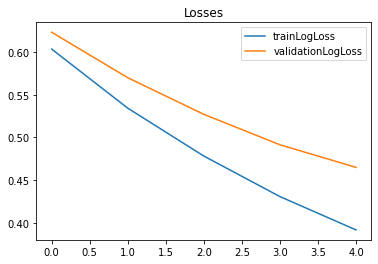

In [118]:
with open(PATH_TO_METRICS) as log:
    df = pd.read_csv(log, sep='\t')
    df = df[df['trainLogLoss'] > 0.0]
    print(f"Num Trees: {df.shape[0]}")
    ax = df.plot()
    print(df.columns[0], df.values[-1][0])
    print(df.columns[1], df.values[-1][1])
    ax.title.set_text('Losses')

In [119]:
classifier = xgb.Booster()
classifier.load_model(PATH_TO_MODEL)
scores = classifier.get_score("", "gain")
print(len(scores.keys()))

262


In [120]:
featureNamesDf = pd.read_csv(FEATURES_PATH)
namesMap = {}
for i, info in featureNamesDf.iterrows():
    namesMap[f"f{i}"] = info['featureName']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

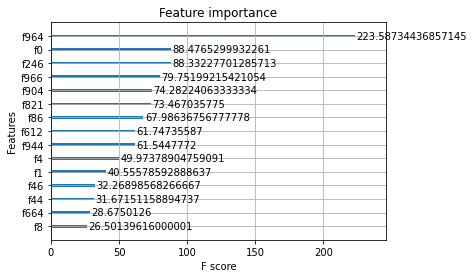

In [121]:
xgb.plot_importance(classifier, max_num_features=15, importance_type="gain")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

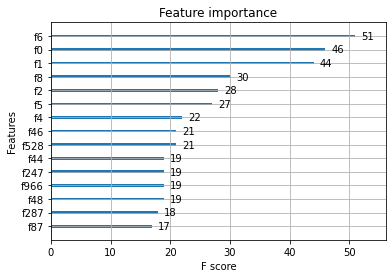

In [122]:
xgb.plot_importance(classifier, max_num_features=15, importance_type="weight")

Text(0.5, 0, 'Xgboost Feature Importance')

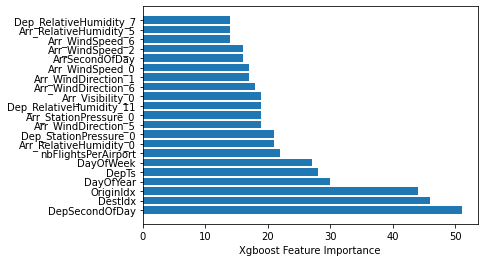

In [127]:
fscores = classifier.get_fscore()
fids = np.array(list(fscores.keys()))
fnames = np.array([namesMap[x] for x in fids])
scores = np.array(list(fscores.values()))
sortedIdx = list(reversed(list(scores.argsort())))[0:21]
plt.barh(fnames[sortedIdx], scores[sortedIdx])
plt.xlabel("Xgboost Feature Importance")